<a href="https://colab.research.google.com/github/RaihanHeggi/markov_chain_ddos_attack/blob/main/preprocessing_features_selection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [51]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sn
import numpy as np

## **Loading Data From Github**

In [52]:
df = pd.read_csv('https://raw.githubusercontent.com/RaihanHeggi/markov_chain_ddos_attack/main/dataset_sdn.csv', sep=';')
df

,dt,switch,src,dst,pktcount,bytecount,dur,dur_nsec,tot_dur,flows,packetins,pktperflow,byteperflow,pktrate,Pairflow,Protocol,port_no,tx_bytes,rx_bytes,tx_kbps,rx_kbps,tot_kbps,label
0,11425,1,10.0.0.1,10.0.0.8,45304,48294064,100,716000000,1.010000e+11,3,1943,13535,14428310,451,0,UDP,3,143928631,3917,0,0,0.0,0.0
1,11605,1,10.0.0.1,10.0.0.8,126395,134737070,280,734000000,2.810000e+11,2,1943,13531,14424046,451,0,UDP,4,3842,3520,0,0,0.0,0.0
2,11425,1,10.0.0.2,10.0.0.8,90333,96294978,200,744000000,2.010000e+11,3,1943,13534,14427244,451,0,UDP,1,3795,1242,0,0,0.0,0.0
3,11425,1,10.0.0.2,10.0.0.8,90333,96294978,200,744000000,2.010000e+11,3,1943,13534,14427244,451,0,UDP,2,3688,1492,0,0,0.0,0.0
4,11425,1,10.0.0.2,10.0.0.8,90333,96294978,200,744000000,2.010000e+11,3,1943,13534,14427244,451,0,UDP,3,3413,3665,0,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104340,5262,3,10.0.0.5,10.0.0.7,79,7742,81,842000000,8.184200e+10,5,10,29,2842,0,0,ICMP,1,15209,12720,1,1,2.0,0.0
104341,5262,3,10.0.0.5,10.0.0.7,79,7742,81,842000000,8.184200e+10,5,10,29,2842,0,0,ICMP,3,15099,14693,1,1,2.0,0.0
104342,5262,3,10.0.0.11,10.0.0.5,31,3038,31,805000000,3.180500e+10,5,10,30,2940,1,0,ICMP,2,3409,3731,0,0,0.0,0.0
104343,5262,3,10.0.0.11,10.0.0.5,31,3038,31,805000000,3.180500e+10,5,10,30,2940,1,0,ICMP,1,15209,12720,1,1,2.0,0.0


## **Dataset Exploration**

In [53]:
df.shape

(104345, 23)

In [54]:
df.dtypes

dt               int64
switch           int64
src             object
dst             object
pktcount         int64
bytecount        int64
dur              int64
dur_nsec         int64
tot_dur        float64
flows            int64
packetins        int64
pktperflow       int64
byteperflow      int64
pktrate          int64
Pairflow         int64
Protocol        object
port_no          int64
tx_bytes         int64
rx_bytes         int64
tx_kbps          int64
rx_kbps          int64
tot_kbps       float64
label          float64
dtype: object

In [55]:
df.drop('src', axis=1, inplace=True)
df.drop('dst', axis=1, inplace=True)

In [56]:
df.dtypes

dt               int64
switch           int64
pktcount         int64
bytecount        int64
dur              int64
dur_nsec         int64
tot_dur        float64
flows            int64
packetins        int64
pktperflow       int64
byteperflow      int64
pktrate          int64
Pairflow         int64
Protocol        object
port_no          int64
tx_bytes         int64
rx_bytes         int64
tx_kbps          int64
rx_kbps          int64
tot_kbps       float64
label          float64
dtype: object

### **Check and Handling Missing anda Duplicate Value**

In [57]:
df.isnull().sum()

dt               0
switch           0
pktcount         0
bytecount        0
dur              0
dur_nsec         0
tot_dur          0
flows            0
packetins        0
pktperflow       0
byteperflow      0
pktrate          0
Pairflow         0
Protocol         0
port_no          0
tx_bytes         0
rx_bytes         0
tx_kbps          0
rx_kbps          0
tot_kbps       506
label          506
dtype: int64

In [58]:
df['label'].fillna(3, inplace=True)
df.drop(df.loc[df['label']==3].index, inplace=True)

In [59]:
df.isnull().sum()

dt             0
switch         0
pktcount       0
bytecount      0
dur            0
dur_nsec       0
tot_dur        0
flows          0
packetins      0
pktperflow     0
byteperflow    0
pktrate        0
Pairflow       0
Protocol       0
port_no        0
tx_bytes       0
rx_bytes       0
tx_kbps        0
rx_kbps        0
tot_kbps       0
label          0
dtype: int64

In [60]:
df.duplicated().sum()

5091

In [61]:
df.drop_duplicates(keep=False,inplace=True)

In [62]:
df.duplicated().sum()

0

In [63]:
df.shape

(94797, 21)

### **Change Value**

In [64]:
df['Protocol'].value_counts()

ICMP    41321
TCP     29436
UDP     24040
Name: Protocol, dtype: int64

In [65]:
df['Protocol'] = df['Protocol'].replace('ICMP', 1)
df['Protocol'] = df['Protocol'].replace('TCP', 2)
df['Protocol'] = df['Protocol'].replace('UDP', 3)

In [66]:
df['Protocol'].value_counts()

1    41321
2    29436
3    24040
Name: Protocol, dtype: int64

### **Check Value Dataset**

In [67]:
df.describe()

,dt,switch,pktcount,bytecount,dur,dur_nsec,tot_dur,flows,packetins,pktperflow,byteperflow,pktrate,Pairflow,Protocol,port_no,tx_bytes,rx_bytes,tx_kbps,rx_kbps,tot_kbps,label
count,94797.000000,94797.000000,94797.000000,9.479700e+04,94797.000000,9.479700e+04,9.479700e+04,94797.000000,94797.000000,94797.000000,9.479700e+04,94797.000000,94797.000000,94797.000000,94797.000000,9.479700e+04,9.479700e+04,94797.000000,94797.000000,94797.000000,94797.000000
mean,18903.998724,4.275578,51186.342068,3.464647e+07,334.696647,4.567395e+08,3.350785e+11,5.868741,5468.580999,6041.559564,4.151593e+06,200.865407,0.661519,1.817705,2.324071,1.007033e+08,1.000155e+08,1067.075213,1054.995496,2122.070709,0.374548
std,12085.002574,1.979543,52733.895362,4.790684e+07,291.621443,2.795878e+08,2.915020e+11,2.977208,5415.632761,7572.477927,7.577795e+06,252.448089,0.473196,0.810098,1.077228,1.550800e+08,1.336830e+08,2500.203273,2079.166555,3205.569363,0.484008
min,2488.000000,1.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,2.000000,4.000000,-130933.000000,-1.464426e+08,-4365.000000,0.000000,1.000000,1.000000,2.527000e+03,8.560000e+02,0.000000,0.000000,0.000000,0.000000
25%,7177.000000,3.000000,724.000000,7.154000e+04,131.000000,2.220000e+08,1.320000e+11,3.000000,1943.000000,29.000000,2.842000e+03,0.000000,0.000000,1.000000,1.000000,5.381000e+03,4.514000e+03,0.000000,0.000000,0.000000,0.000000
50%,15215.000000,4.000000,37685.000000,5.249754e+06,260.000000,4.120000e+08,2.610000e+11,5.000000,3034.000000,8089.000000,5.011200e+05,269.000000,1.000000,2.000000,2.000000,6.496686e+06,2.619760e+07,0.000000,1.000000,98.000000,0.000000
75%,30441.000000,6.000000,92712.000000,6.626078e+07,432.000000,6.960000e+08,4.320000e+11,7.000000,7916.000000,9812.000000,9.527006e+06,327.000000,1.000000,3.000000,3.000000,1.439286e+08,1.469663e+08,296.000000,811.000000,3838.000000,1.000000
max,42935.000000,10.000000,260006.000000,1.471280e+08,1881.000000,9.990000e+08,1.880000e+12,17.000000,25224.000000,19190.000000,1.495387e+07,639.000000,1.000000,3.000000,5.000000,1.269982e+09,9.905962e+08,20580.000000,16577.000000,20580.000000,1.000000


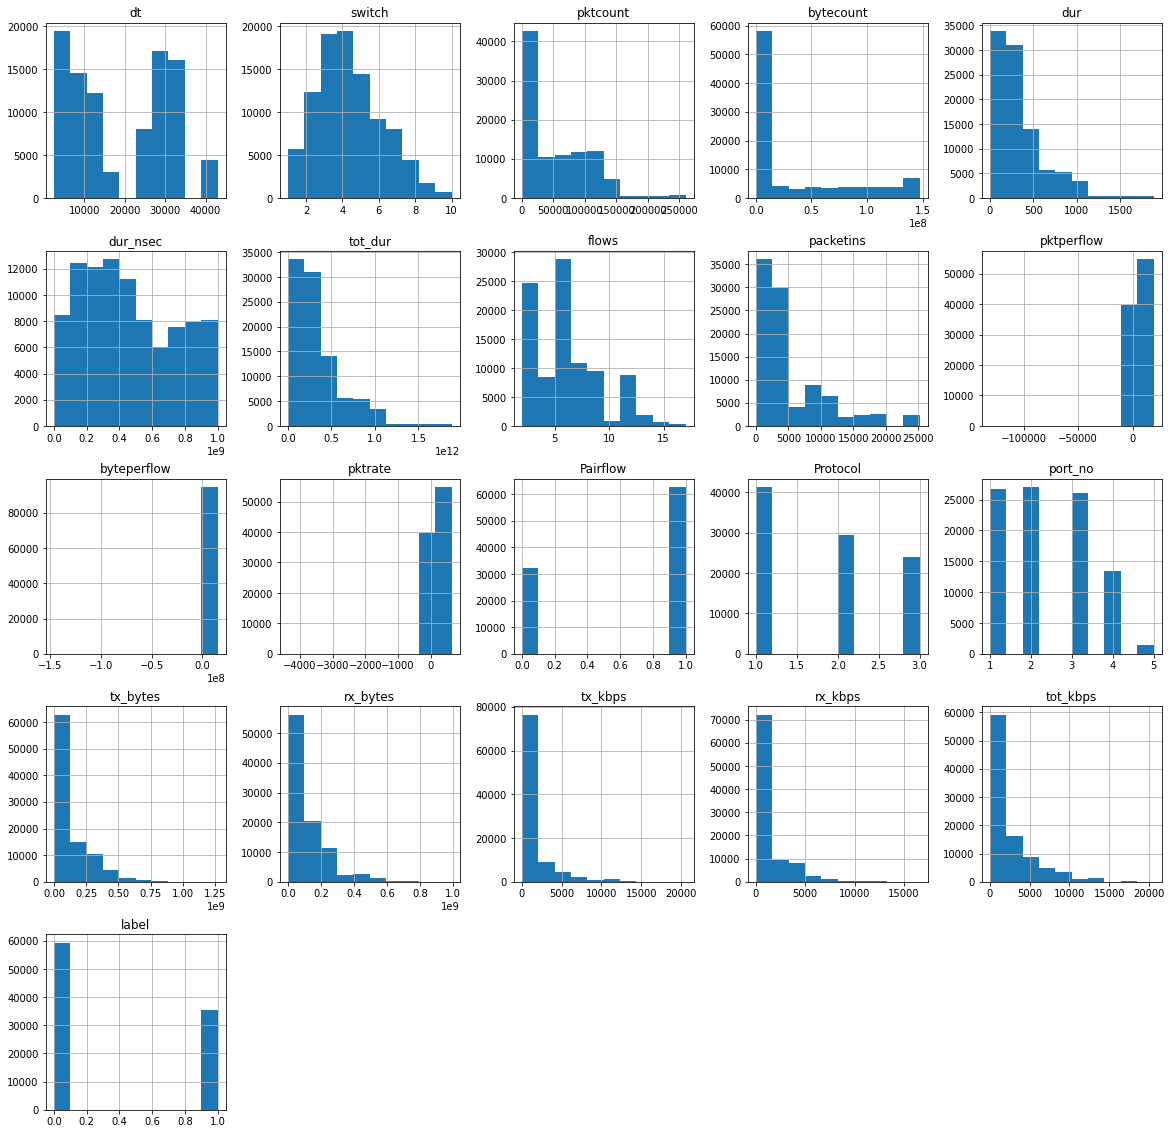

In [68]:
grafikValue = df.hist(figsize=(20,20))

Dari Grafik Bisa Dilihat Sebaran dari data yang ada pada dataset 

In [69]:
df.corr()

,dt,switch,pktcount,bytecount,dur,dur_nsec,tot_dur,flows,packetins,pktperflow,byteperflow,pktrate,Pairflow,Protocol,port_no,tx_bytes,rx_bytes,tx_kbps,rx_kbps,tot_kbps,label
dt,1.000000,-0.031024,-0.163547,-0.261956,0.249229,-0.171671,0.249025,0.290988,0.007024,-0.214218,-0.275705,-0.214325,0.694461,-0.544529,-0.017305,0.047878,0.062183,-0.054837,-0.059357,-0.081270,-0.085653
switch,-0.031024,1.000000,-0.048260,-0.157398,-0.040018,-0.077934,-0.040146,-0.051106,0.190215,-0.020127,-0.093517,-0.020125,0.058296,-0.070602,-0.004210,-0.073175,-0.085864,-0.044651,-0.054676,-0.070289,0.030755
pktcount,-0.163547,-0.048260,1.000000,0.652768,0.010631,0.027452,0.010680,-0.249680,0.304394,0.478661,0.284621,0.478700,-0.052721,0.452146,-0.001383,0.038601,0.041730,0.012170,0.010596,0.016365,0.425608
bytecount,-0.261956,-0.157398,0.652768,1.000000,0.042932,0.015062,0.042912,-0.212306,-0.098283,0.324139,0.530199,0.324165,-0.349328,0.442483,-0.023669,0.039118,0.039676,0.075867,0.084131,0.113742,0.284610
dur,0.249229,-0.040018,0.010631,0.042932,1.000000,-0.053067,0.999998,0.156221,-0.156979,-0.321063,-0.239361,-0.321315,0.138742,-0.456846,0.002215,0.135242,0.159237,-0.158155,-0.187738,-0.245123,-0.102478
dur_nsec,-0.171671,-0.077934,0.027452,0.015062,-0.053067,1.000000,-0.051734,-0.003731,-0.052005,0.035624,0.035420,0.035622,-0.213781,0.101408,0.018359,0.018653,0.021086,-0.028489,-0.036213,-0.045708,0.027243
tot_dur,0.249025,-0.040146,0.010680,0.042912,0.999998,-0.051734,1.000000,0.156222,-0.157057,-0.321051,-0.239360,-0.321303,0.138474,-0.456794,0.002249,0.135292,0.159295,-0.158231,-0.187830,-0.245242,-0.102478
flows,0.290988,-0.051106,-0.249680,-0.212306,0.156221,-0.003731,0.156222,1.000000,0.012266,-0.195771,-0.214694,-0.195887,0.343457,-0.495168,0.042064,0.144393,0.170853,0.145276,0.177524,0.228452,-0.169579
packetins,0.007024,0.190215,0.304394,-0.098283,-0.156979,-0.052005,-0.157057,0.012266,1.000000,0.219598,-0.070513,0.219672,0.226942,0.192549,0.004948,0.081140,0.092229,0.023324,0.025599,0.034796,0.010184
pktperflow,-0.214218,-0.020127,0.478661,0.324139,-0.321063,0.035624,-0.321051,-0.195771,0.219598,1.000000,0.804258,0.999999,-0.130433,0.493165,-0.002139,-0.030875,-0.039657,0.122699,0.142171,0.187914,0.121529


In [70]:
df.cov()

,dt,switch,pktcount,bytecount,dur,dur_nsec,tot_dur,flows,packetins,pktperflow,byteperflow,pktrate,Pairflow,Protocol,port_no,tx_bytes,rx_bytes,tx_kbps,rx_kbps,tot_kbps,label
dt,1.460473e+08,-7.421810e+02,-1.042267e+08,-1.516608e+11,8.783433e+05,-5.800447e+11,8.772657e+14,1.046961e+04,4.597269e+05,-1.960386e+07,-2.524846e+10,-6.538717e+05,3.971325e+03,-5.330958e+03,-2.252875e+02,8.973105e+10,1.004602e+11,-1.656900e+06,-1.491442e+06,-3.148341e+06,-5.010037e+02
switch,-7.421810e+02,3.918591e+00,-5.037804e+03,-1.492663e+07,-2.310144e+01,-4.313297e+07,-2.316582e+10,-3.011939e-01,2.039194e+03,-3.017111e+02,-1.402806e+06,-1.005689e+01,5.460655e-02,-1.132192e-01,-8.977617e-03,-2.246384e+07,-2.272237e+07,-2.209872e+02,-2.250348e+02,-4.460220e+02,2.946660e-02
pktcount,-1.042267e+08,-5.037804e+03,2.780864e+09,1.649096e+12,1.634869e+05,4.047469e+11,1.641744e+14,-3.919977e+04,8.693108e+07,1.911418e+08,1.137365e+11,6.372728e+06,-1.315576e+03,1.931552e+04,-7.856229e+01,3.156769e+11,2.941807e+11,1.604572e+06,1.161748e+06,2.766320e+06,1.086307e+04
bytecount,-1.516608e+11,-1.492663e+07,1.649096e+12,2.295066e+15,5.997830e+08,2.017431e+14,5.992630e+17,-3.028097e+07,-2.549922e+10,1.175891e+11,1.924771e+14,3.920447e+09,-7.919018e+06,1.717245e+07,-1.221485e+06,2.906245e+14,2.540969e+14,9.087163e+09,8.379979e+09,1.746714e+10,6.599354e+06
dur,8.783433e+05,-2.310144e+01,1.634869e+05,5.997830e+08,8.504307e+04,-4.326723e+09,8.500811e+13,1.356341e+02,-2.479199e+05,-7.090028e+05,-5.289504e+08,-2.365500e+04,1.914561e+01,-1.079262e+02,6.958450e-01,6.116287e+09,6.207824e+09,-1.153130e+05,-1.138311e+05,-2.291441e+05,-1.446442e+01
dur_nsec,-5.800447e+11,-4.313297e+07,4.047469e+11,2.017431e+14,-4.326723e+09,7.816935e+16,-4.216358e+18,-3.105816e+06,-7.874301e+10,7.542252e+10,7.504197e+13,2.514217e+09,-2.828316e+07,2.296835e+07,5.529381e+06,8.087580e+14,7.881249e+14,-1.991429e+10,-2.105099e+10,-4.096529e+10,3.686579e+06
tot_dur,8.772657e+14,-2.316582e+10,1.641744e+14,5.992630e+17,8.500811e+13,-4.216358e+18,8.497344e+22,1.355790e+11,-2.479407e+14,-7.086863e+14,-5.287327e+17,-2.364444e+13,1.910076e+10,-1.078698e+11,7.061331e+08,6.116038e+18,6.207545e+18,-1.153209e+14,-1.138404e+14,-2.291613e+14,-1.445861e+10
flows,1.046961e+04,-3.011939e-01,-3.919977e+04,-3.028097e+07,1.356341e+02,-3.105816e+06,1.355790e+11,8.863768e+00,1.977713e+02,-4.413627e+03,-4.843649e+06,-1.472270e+02,4.838630e-01,-1.194262e+00,1.349046e-01,6.666691e+07,6.800000e+07,1.081378e+03,1.098892e+03,2.180270e+03,-2.443616e-01
packetins,4.597269e+05,2.039194e+03,8.693108e+07,-2.549922e+10,-2.479199e+05,-7.874301e+10,-2.479407e+14,1.977713e+02,2.932908e+07,9.005681e+06,-2.893743e+09,3.003277e+05,5.815743e+02,8.447522e+02,2.886597e+01,6.814616e+10,6.677152e+10,3.158085e+05,2.882494e+05,6.040579e+05,2.669561e+01
pktperflow,-1.960386e+07,-3.017111e+02,1.911418e+08,1.175891e+11,-7.090028e+05,7.542252e+10,-7.086863e+14,-4.413627e+03,9.005681e+06,5.734242e+07,4.615047e+10,1.911655e+06,-4.673740e+02,3.025294e+03,-1.744998e+01,-3.625830e+10,-4.014570e+10,2.323036e+06,2.238408e+06,4.561444e+06,4.454221e+02


In [71]:
df.var()

dt             1.460473e+08
switch         3.918591e+00
pktcount       2.780864e+09
bytecount      2.295066e+15
dur            8.504307e+04
dur_nsec       7.816935e+16
tot_dur        8.497344e+22
flows          8.863768e+00
packetins      2.932908e+07
pktperflow     5.734242e+07
byteperflow    5.742297e+13
pktrate        6.373004e+04
Pairflow       2.239140e-01
Protocol       6.562594e-01
port_no        1.160420e+00
tx_bytes       2.404979e+16
rx_bytes       1.787114e+16
tx_kbps        6.251016e+06
rx_kbps        4.322934e+06
tot_kbps       1.027567e+07
label          2.342642e-01
dtype: float64

### **Check Outlier**

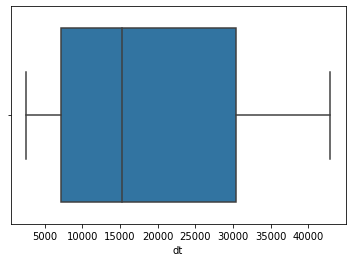

In [72]:
ax = sn.boxplot(x=df['dt'])

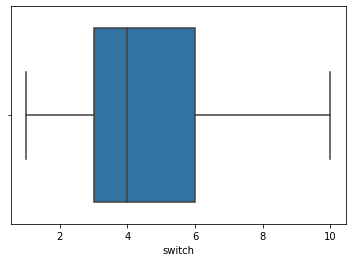

In [73]:
ax = sn.boxplot(x=df['switch'])

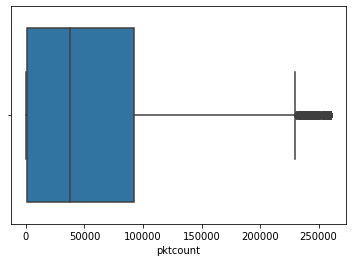

In [74]:
ax = sn.boxplot(x=df['pktcount'])

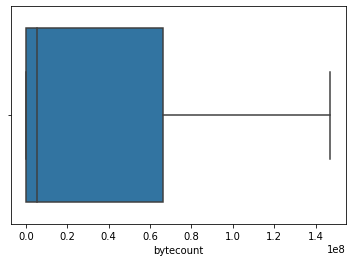

In [75]:
ax = sn.boxplot(x=df['bytecount'])

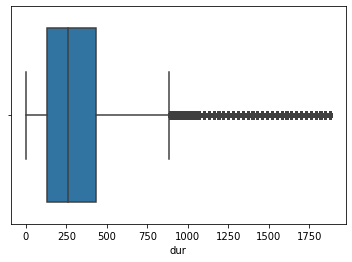

In [76]:
ax = sn.boxplot(x=df['dur'])

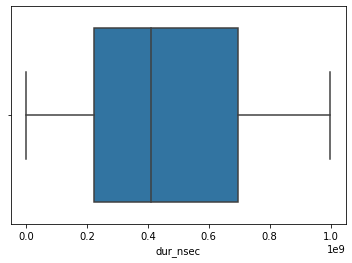

In [77]:
ax = sn.boxplot(x=df['dur_nsec'])

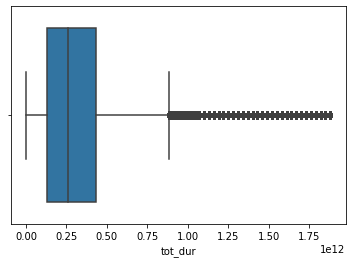

In [78]:
ax = sn.boxplot(x=df['tot_dur'])

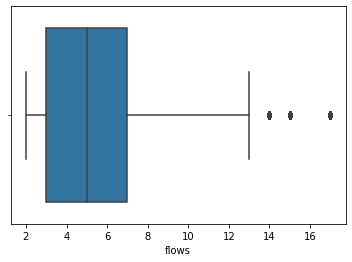

In [79]:
ax = sn.boxplot(x=df['flows'])

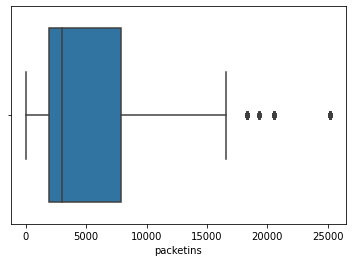

In [80]:
ax = sn.boxplot(x=df['packetins'])

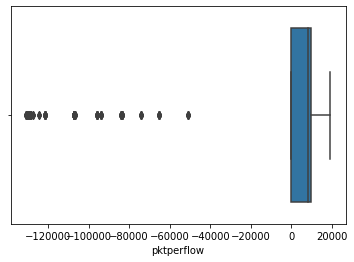

In [81]:
ax = sn.boxplot(x=df['pktperflow'])

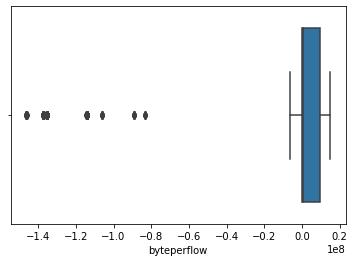

In [82]:
ax = sn.boxplot(x=df['byteperflow'])

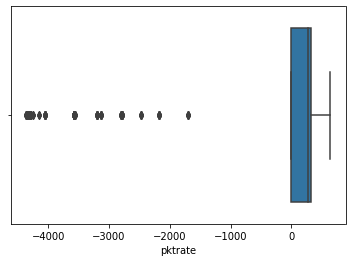

In [83]:
ax = sn.boxplot(x=df['pktrate'])

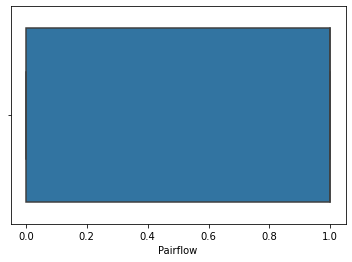

In [84]:
ax = sn.boxplot(x=df['Pairflow'])

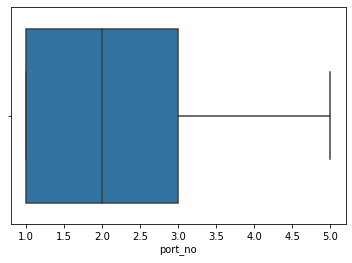

In [85]:
ax = sn.boxplot(x=df['port_no'])

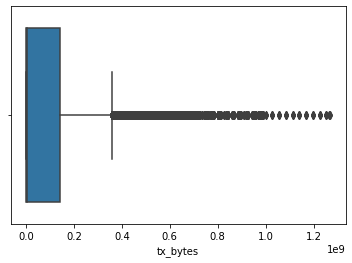

In [86]:
ax = sn.boxplot(x=df['tx_bytes'])

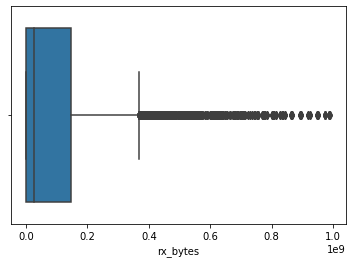

In [87]:
ax = sn.boxplot(x=df['rx_bytes'])

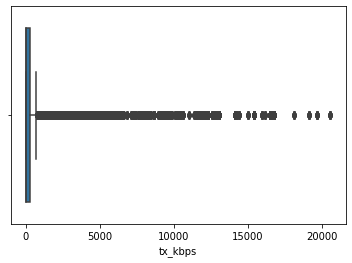

In [88]:
ax = sn.boxplot(x=df['tx_kbps'])

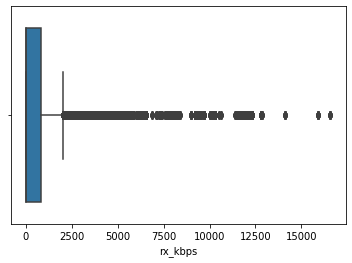

In [89]:
ax = sn.boxplot(x=df['rx_kbps'])

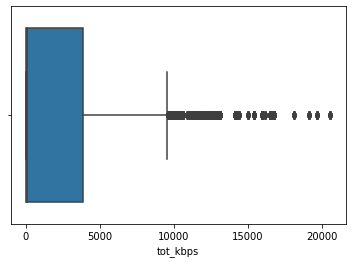

In [90]:
ax = sn.boxplot(x=df['tot_kbps'])

### **Distribution Value**

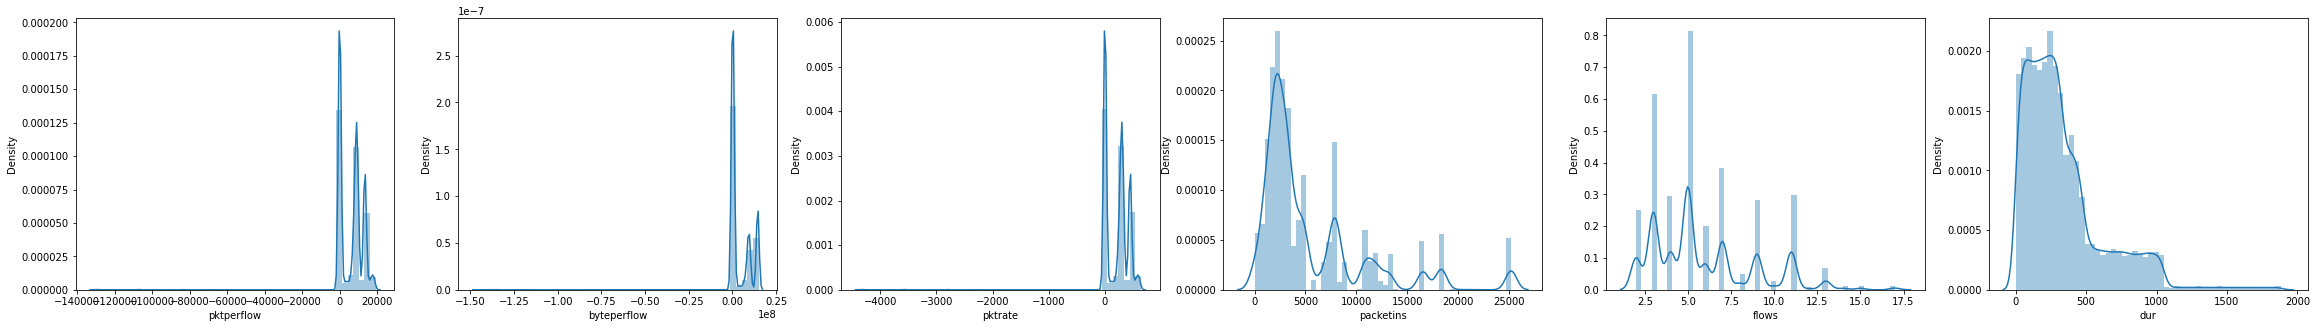

In [91]:
import warnings
warnings.filterwarnings('ignore')
plt.figure(figsize=(40,5))
plt.subplot(1,6,1)
sn.distplot(df['pktperflow'])
plt.subplot(1,6,2)
sn.distplot(df['byteperflow'])
plt.subplot(1,6,3)
sn.distplot(df['pktrate'])
plt.subplot(1,6,4)
sn.distplot(df['packetins'])
plt.subplot(1,6,5)
sn.distplot(df['flows'])
plt.subplot(1,6,6)
sn.distplot(df['dur'])
plt.show()

In [92]:
df.skew()

dt             0.158574
switch         0.487072
pktcount       0.860748
bytecount      1.113207
dur            1.705279
dur_nsec       0.315198
tot_dur        1.704043
flows          0.923080
packetins      1.860365
pktperflow    -6.792321
byteperflow   -6.909157
pktrate       -6.789892
Pairflow      -0.682687
Protocol       0.343588
port_no        0.312111
tx_bytes       1.934460
rx_bytes       1.676269
tx_kbps        3.172209
rx_kbps        2.571557
tot_kbps       1.770432
label          0.518400
dtype: float64

### **Check Menggunakan Heatmap**

In [93]:
corrVal = df.corr()

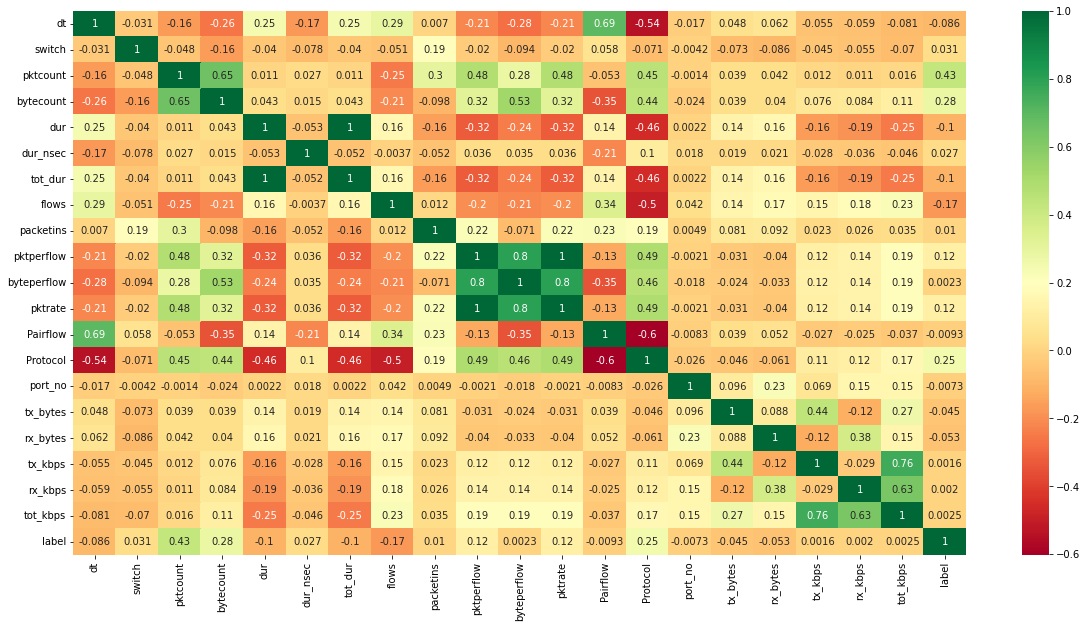

In [94]:
plt.figure(figsize=(20,10))
sn.heatmap(corrVal,annot=True,cmap ='RdYlGn')
plt.show()

bytecount, pktcounte, switch, dur_nsec, packetins, pktperflow, byteperflow, pktrate, protocol, port_no, tx_kbps, rx_kbps, tot_kbps

### **Cek Menggunakan Features Importance**

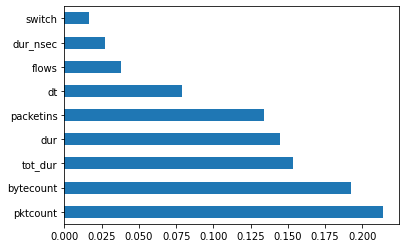

In [95]:
from sklearn.ensemble import ExtraTreesClassifier
model= ExtraTreesClassifier()
X = df[df.columns[:9]]
Y = df['label']
model.fit(X,Y)
importance = pd.Series(model.feature_importances_,index=X.columns).sort_values(ascending=False)
importance.nlargest(15).plot(kind='barh')
plt.show()

### **Cek Menggunakan Univarite Selection**

In [96]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [97]:
bestfeatures = SelectKBest(score_func=chi2, k=9)
fit = bestfeatures.fit(X,Y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Feature','Score']
print(featureScores.nlargest(15,'Score'))

     Feature         Score
6    tot_dur  2.524588e+14
3  bytecount  5.086605e+11
5   dur_nsec  1.204100e+10
2   pktcount  9.329010e+08
0         dt  5.372943e+06
4        dur  2.529500e+05
8  packetins  5.273381e+04
7      flows  4.117230e+03
1     switch  8.217679e+01
